# Finding Anamolies in Short Volume

* GME according to the SEC is providing an idioscyractic risk to the markets. 
* GME according to the APEs is shorted all to hell, and the SHFs are hiding the truth. 
* FINRA data shows wierd behavior when GME is compared to TSLA, AMC, BBY, and others. 

Could it all be true? 

### Short Volume vs Short Interest
**Short Volume** is the daily reported amount of shares sold short for the day. 

**Short Interest** is the twice a month self reported number of shorts held by large institutions. 

**Synthetic shares** Basically counterfeit shares diluting the real shares. These can be manufactured in a host of ways. -- Read DD links. 


### Study

For the first chapter we will introduce GME short interest over time and compare it with Best Buy (BBY), AMC, and Tesla (TSLA). Just to show the share percentages.  

First you need to download the data for the short interest for the year for all tickers. 


# Load up the libraries required

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
import numpy as np
import fnmatch
import os
import pandas as pd
import datetime

import yfinance as yf
import time
import requests
import io

In [2]:
# Custom functions 

In [3]:
def get_df(sdir, NAME, raw_x, TICKER ):
    '''
    This function iterates through RegSHO data over a data range and pulls rows for a TICKER and
    puts the data into a pandas data frame
    a row is as follows. The consolodated daily short data is in the CNMSyyyymmdd.txt file for every trade day
    
    Date|Symbol|ShortVolume|ShortExemptVolume|TotalVolume|Market
    
    '''
    xxx = []
    for shortdate in raw_x:
        #print(shortdate)
        for file in os.listdir(sdir):
            matchme = prefix+str(shortdate)+'*'
            if fnmatch.fnmatch(file, matchme):
                xxx.append(file)

    df = None            


    for filename in xxx:
        f = open(sdir+filename)
        try:
            fullfile = pd.read_csv(f,sep="|")
            if df is None:
                tickerrow = fullfile.loc[fullfile['Symbol'] == TICKER]
                df = tickerrow

            else:
                tickerrow = fullfile.loc[fullfile['Symbol'] == TICKER]
                df = df.append(tickerrow)
        except:
            pass
            #print('failed: {}'.format(filename))
    print('completed loading')
    return df

## Load up the data

We have to build the filename it follows the format

```CNSMshvolYYYYMMDD.txt```

In [4]:
TICKER = 'GME'
# Generate dates to pull logs with
# We need to convert the Date time to YYYYMMDD as that is the format
# dates here are max values that are available. The earliest data I have is 20190102
startdate = '20180101'
enddate = '20220101'
x = pd.date_range(start=startdate,end=enddate,freq='D').strftime('%Y%m%d')

# this is the location of where I downloaded the data. REPLACE this with where you have your data 
sdir =  '/home/pookie/data/shortdata2/'

# Base Filename Generation
prefix = 'CNMSshvol'
#prefix = 'FNSQshvol'
# Our test Ticker.. 
#TICKER = 'AMD'

df = get_df(sdir, prefix, x, TICKER)
df.tail()
#initial_short_position = 71200000
initial_short_position = 0

completed loading


### Making Pretty Plots 
Change Data from YYYYMMDD to machine readable.

Naming convention:
    ``df`` stands for data frame in PANDAS
The ``df_`` prefix is used in the notebook to help me keep track

In [5]:
# Change the date format from YYYYMMDD to matplotlib compliant 
import datetime as dt
date_fmt ='%Y%m%d'

raw_x = df['Date']
df_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]

# df_dt will be used throughout the file as the time series

Text(0.5, 0, 'Date')

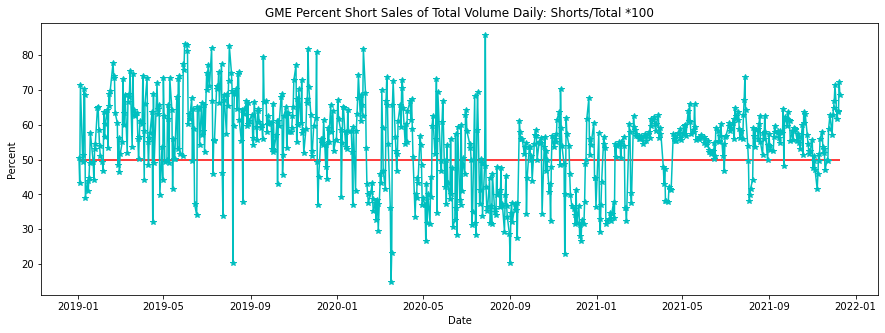

In [6]:
# Pull the total volume every day 
df_tv = df['TotalVolume']

# Pull the short volume every day 
df_sv = df['ShortVolume']

df_percent = df_sv/df_tv *100 
# We can also plot on a single canvas easily

plt.plot(df_dt,df_percent,'c-*')
plt.hlines(y=50, xmin=df_dt[0], xmax=df_dt[-1],color='r')

plt.title('{} Percent Short Sales of Total Volume Daily: Shorts/Total *100'.format(TICKER))
plt.ylabel('Percent')
plt.xlabel('Date')

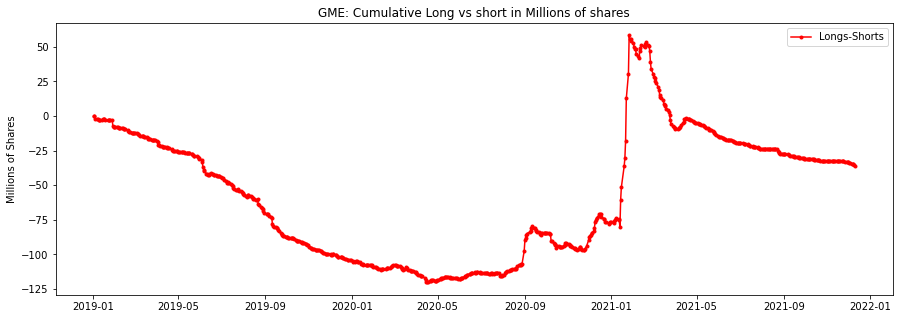

In [7]:
c_df_tv = np.cumsum(df_tv)
c_df_sv = np.cumsum(df_sv)
c_df_lv = np.cumsum(df_tv-df_sv)

# Daily Difference between shorts and longs
dd = c_df_lv - c_df_sv
plt.plot(df_dt,dd/1e6, 'r.-',label='Longs-Shorts')
#plt.hlines(y=0, xmin=df_dt[0], xmax=df_dt[-1],color='g')
plt.title('{}: Cumulative Long vs short in Millions of shares'.format(TICKER))
plt.ylabel('Millions of Shares')
plt.legend()

In [8]:
# Now to add the dollars to this. 
df

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
3074,20190102,GME,266858.0,0.0,529621.0,"Q,N"
3052,20190103,GME,203573.0,2100.0,471602.0,"Q,N"
3039,20190104,GME,3723340.0,1584.0,5218886.0,"Q,N"
3060,20190107,GME,631100.0,1184.0,1227566.0,"Q,N"
3057,20190108,GME,631902.0,1128.0,1279886.0,"Q,N"
...,...,...,...,...,...,...
4021,20211206,GME,471069.0,14541.0,762959.0,"B,Q,N"
4015,20211207,GME,431079.0,153.0,678333.0,"B,Q,N"
3959,20211208,GME,523994.0,591.0,817482.0,"B,Q,N"
3989,20211209,GME,1288513.0,14012.0,1784709.0,"B,Q,N"


In [9]:
#startdate = '20180101'
#enddate = '20180201'

start = datetime.datetime.strptime(startdate,'%Y%m%d')
end = datetime.datetime.strptime(enddate,'%Y%m%d')

stock = yf.download(TICKER,start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'), progress=False)

In [10]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,17.959999,18.290001,17.780001,18.260000,15.953856,2832700
2018-01-03,18.290001,18.370001,17.920000,18.200001,15.901434,3789200
2018-01-04,18.200001,18.379999,17.959999,18.320000,16.006279,2781300
2018-01-05,18.379999,18.730000,18.219999,18.680000,16.320812,3019000
2018-01-08,18.799999,19.400000,18.799999,19.230000,16.801350,3668400


In [11]:
derp = df 
format = '%Y%m%d'
derp['Datetime'] = pd.to_datetime(derp['Date'] , format=format)
derp = derp.set_index(pd.DatetimeIndex(df['Datetime']))
derp.head()

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market,Datetime
Datetime,,,,,,,
2019-01-02,20190102,GME,266858.0,0.0,529621.0,"Q,N",2019-01-02
2019-01-03,20190103,GME,203573.0,2100.0,471602.0,"Q,N",2019-01-03
2019-01-04,20190104,GME,3723340.0,1584.0,5218886.0,"Q,N",2019-01-04
2019-01-07,20190107,GME,631100.0,1184.0,1227566.0,"Q,N",2019-01-07
2019-01-08,20190108,GME,631902.0,1128.0,1279886.0,"Q,N",2019-01-08


In [12]:
del derp['Date']
del derp['Datetime']
derp.head()

,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
Datetime,,,,,
2019-01-02,GME,266858.0,0.0,529621.0,"Q,N"
2019-01-03,GME,203573.0,2100.0,471602.0,"Q,N"
2019-01-04,GME,3723340.0,1584.0,5218886.0,"Q,N"
2019-01-07,GME,631100.0,1184.0,1227566.0,"Q,N"
2019-01-08,GME,631902.0,1128.0,1279886.0,"Q,N"


In [13]:
derpy = derp.merge(stock, left_index=True, right_index=True, how='inner')
derpy.head()

,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market,Open,High,Low,Close,Adj Close,Volume
2019-01-02,GME,266858.0,0.0,529621.0,"Q,N",12.45,13.18,12.42,13.07,12.641105,2124200
2019-01-03,GME,203573.0,2100.0,471602.0,"Q,N",12.98,13.26,12.69,12.97,12.544387,1750400
2019-01-04,GME,3723340.0,1584.0,5218886.0,"Q,N",14.03,15.29,13.70,15.24,14.739896,11915700
2019-01-07,GME,631100.0,1184.0,1227566.0,"Q,N",15.11,15.81,14.94,15.48,14.972020,4718000
2019-01-08,GME,631902.0,1128.0,1279886.0,"Q,N",15.50,15.89,15.15,15.81,15.291192,3443800


In [14]:

derpy['NetShort'] = derpy.TotalVolume - 2*(derpy.ShortVolume+derpy.ShortExemptVolume)
derpy['NSValueClose'] = derpy.NetShort * derpy.Close 
derpy['NSValueOpen'] = derpy.NetShort * derpy.Open 

Text(0, 0.5, 'Millions of Shares')

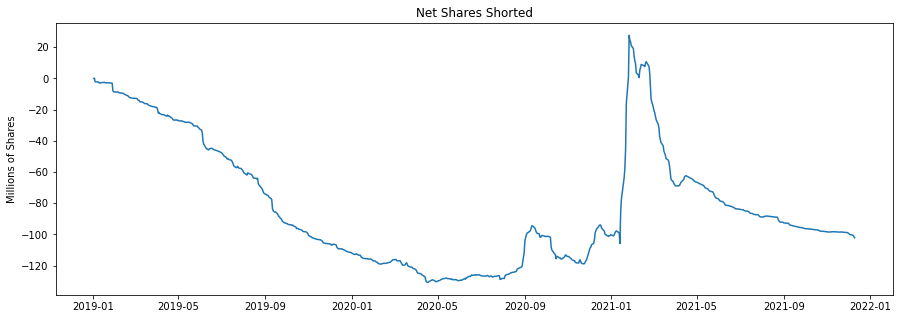

In [15]:
x = derpy.index
y = derpy.TotalVolume
yy = derpy.NetShort
cyy = np.cumsum(yy)
plt.plot(x, cyy/1e6)
plt.title('Net Shares Shorted')
plt.ylabel('Millions of Shares')

Text(0.5, 1.0, 'NetShort Billions ')

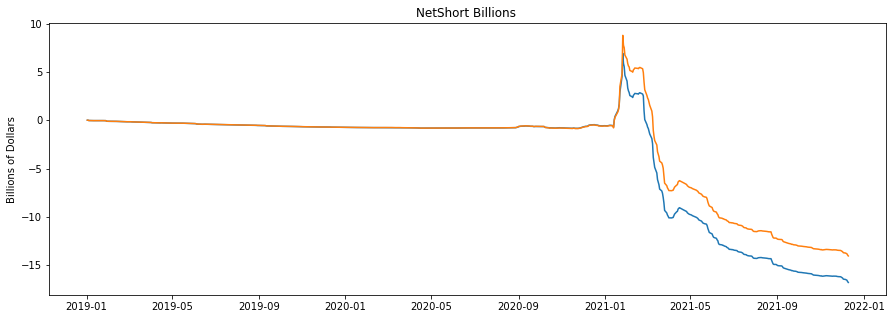

In [16]:
zzo = np.cumsum(derpy.NSValueOpen)
zzc = np.cumsum(derpy.NSValueClose)

plt.figure(figsize=(15,5))
plt.plot(x, zzo/1e9,label='Open Price')
plt.plot(x, zzc/1e9,label='Close Price')
plt.ylabel('Billions of Dollars')
plt.title('NetShort Billions ')


Text(0.5, 1.0, 'NetShort Billions ')

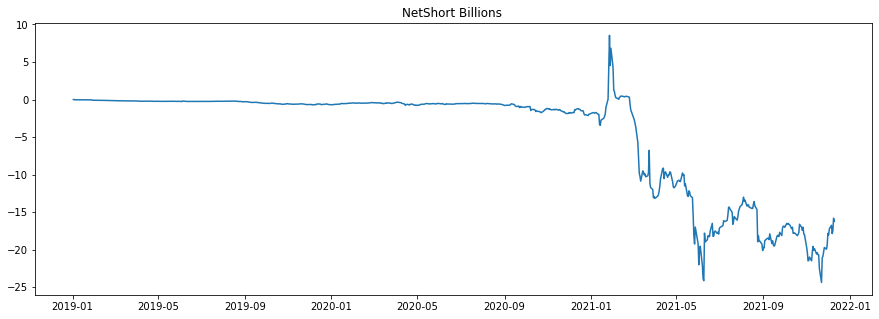

In [17]:
zztop = cyy * derpy.Close
plt.plot(x, zztop/1e9)
plt.title('NetShort Billions ')


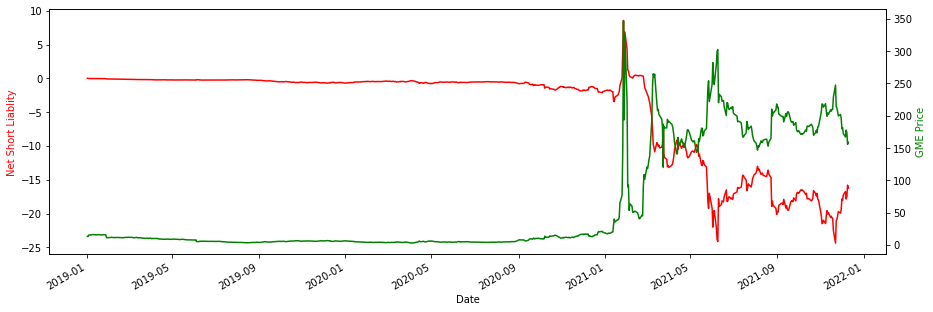

In [18]:
fig, ax1 = plt.subplots()
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
ax2 = ax1.twinx()
ax1.plot(x, zztop/1e9, 'r-')
ax2.plot(x, derpy.Close, 'g-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Net Short Liablity', color='r')
ax2.set_ylabel('GME Price', color='g');

In [19]:
totalshares = 70e6 # shares
marketcap = totalshares * derpy.Close

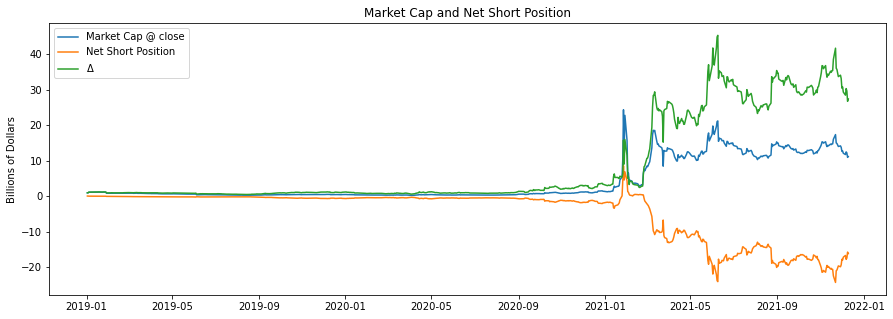

In [20]:
plt.plot(x, marketcap/1e9, label='Market Cap @ close') 
plt.plot(x, zztop/1e9, label='Net Short Position')
deltamc = marketcap-zztop
plt.plot(x, deltamc/1e9, label='$\Delta$')

plt.legend()
plt.ylabel('Billions of Dollars')
plt.title('Market Cap and Net Short Position');